<a href="https://colab.research.google.com/github/Meghashyamt/Telecom-Project/blob/master/Telecom_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/Meghashyamt/Telecom-Project.git


fatal: destination path 'Telecom-Project' already exists and is not an empty directory.


In [0]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from scipy import stats

#import data visuvalize
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [0]:
data =pd.read_csv("Telecom-Project/telecom_churn_data.csv")

In [8]:
data.head(2)

,State,Account Length,Area code,Phone,International Plan,Vmail plan,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area code               4617 non-null int64
Phone                   4617 non-null object
International Plan      4617 non-null object
Vmail plan              4617 non-null object
Vmail Message           4617 non-null int64
Day mins                4617 non-null float64
Day calls               4617 non-null int64
Day charge              4617 non-null float64
Eve mins                4617 non-null float64
Eve calls               4617 non-null int64
Eve charge              4617 non-null float64
Night mins              4617 non-null float64
Night calls             4617 non-null int64
Night charge            4617 non-null float64
International mins      4617 non-null float64
International calls     4617 non-null int64
International charge    4617 non-null float64
Custserve calls         4617 non-null

In [0]:
#Adding new column and changing to binary
data['ChurnFlag']=(data['Churn']== True).astype(int)

In [11]:
data.head(20)

,State,Account Length,Area code,Phone,International Plan,Vmail plan,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,Churn,ChurnFlag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,0
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,0


In [0]:
#slicing X and y
X=data.iloc[:,6:19]
y=data.iloc[:,21]

In [0]:
#training and test
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=100)

In [0]:
#Logistic Model
model = LogisticRegression()

In [0]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [0]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
#Fitting the model
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the model
predict = model.predict(X_test)

In [19]:
accuracy_score(y_test, predict)

0.8759018759018758

In [20]:
confusion_matrix(y_test, predict)

array([[1205,    0],
       [ 172,    9]])

In [21]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1205
           1       1.00      0.05      0.09       181

    accuracy                           0.88      1386
   macro avg       0.94      0.52      0.51      1386
weighted avg       0.89      0.88      0.82      1386



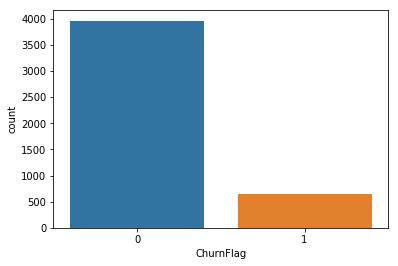

In [22]:
sb.countplot(x='ChurnFlag', data=data)